In [1]:
from sklearn.datasets import fetch_lfw_people

In [2]:
df = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [25]:
df.images

array([[[0.9973857 , 0.99607843, 0.9921568 , ..., 0.29803923,
         0.24836601, 0.20653595],
        [0.9973857 , 0.9921569 , 0.9908497 , ..., 0.30588236,
         0.2535948 , 0.21568628],
        [0.96078426, 0.93071896, 0.8679738 , ..., 0.2875817 ,
         0.24183007, 0.21568628],
        ...,
        [0.34509805, 0.26143792, 0.17385621, ..., 0.4248366 ,
         0.40261438, 0.39084968],
        [0.30980393, 0.23398693, 0.17124183, ..., 0.39869282,
         0.4013072 , 0.3764706 ],
        [0.28366014, 0.2248366 , 0.18039216, ..., 0.38169935,
         0.38823533, 0.3803922 ]],

       [[0.14771242, 0.19738562, 0.1751634 , ..., 0.24183007,
         0.2       , 0.14509805],
        [0.18039216, 0.24836601, 0.24575163, ..., 0.21437909,
         0.21960784, 0.1751634 ],
        [0.21045752, 0.303268  , 0.33594772, ..., 0.2653595 ,
         0.18431373, 0.16993465],
        ...,
        [0.2875817 , 0.29803923, 0.29673204, ..., 0.503268  ,
         0.46797386, 0.4535948 ],
        [0.2

In [6]:
X = df.data

In [7]:
X

array([[0.9973857 , 0.99607843, 0.9921568 , ..., 0.38169935, 0.38823533,
        0.3803922 ],
       [0.14771242, 0.19738562, 0.1751634 , ..., 0.45751634, 0.44444445,
        0.53594774],
       [0.34379086, 0.39477125, 0.49150327, ..., 0.709804  , 0.72156864,
        0.7163399 ],
       ...,
       [0.3633987 , 0.3372549 , 0.30718955, ..., 0.19738562, 0.22091503,
        0.19346406],
       [0.19346406, 0.24705882, 0.34248367, ..., 0.7346406 , 0.6640523 ,
        0.6117647 ],
       [0.11633987, 0.10196079, 0.1267974 , ..., 0.13333334, 0.13725491,
        0.2535948 ]], dtype=float32)

In [8]:
y = df.target

In [9]:
y

array([5, 6, 3, ..., 5, 3, 5])

In [10]:
X = (X - X.min()) / (X.max() - X.min())

In [11]:
X

array([[0.9973857 , 0.99607843, 0.9921568 , ..., 0.38169935, 0.38823533,
        0.3803922 ],
       [0.14771242, 0.19738562, 0.1751634 , ..., 0.45751634, 0.44444445,
        0.53594774],
       [0.34379086, 0.39477125, 0.49150327, ..., 0.709804  , 0.72156864,
        0.7163399 ],
       ...,
       [0.3633987 , 0.3372549 , 0.30718955, ..., 0.19738562, 0.22091503,
        0.19346406],
       [0.19346406, 0.24705882, 0.34248367, ..., 0.7346406 , 0.6640523 ,
        0.6117647 ],
       [0.11633987, 0.10196079, 0.1267974 , ..., 0.13333334, 0.13725491,
        0.2535948 ]], dtype=float32)

In [12]:
X.shape

(1288, 1850)

In [14]:
X.mean()

np.float32(0.5083979)

In [22]:
mean_face = X.mean(axis=0)

In [26]:
n_samples, h, w = df.images.shape

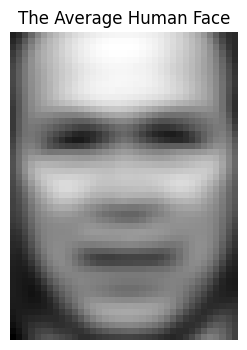

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.imshow(mean_face.reshape((h, w)), cmap='gray')
plt.title("The Average Human Face")
plt.axis('off') # Hides the ugly axes
plt.show()

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(
    n_components=150,
    # svd_solver='randomized',
    # whiten=True
)

In [31]:
pca.fit(X)

PCA(n_components=150)

In [32]:
pca.components_

array([[ 0.00952586,  0.01058325,  0.0124283 , ...,  0.01852938,
         0.01643139,  0.013357  ],
       [-0.02152731, -0.02000211, -0.0217403 , ...,  0.04359014,
         0.04175104,  0.0398791 ],
       [ 0.02458001,  0.02218484,  0.02083654, ...,  0.05229988,
         0.04575043,  0.04077829],
       ...,
       [ 0.01867053, -0.0056118 , -0.01108716, ...,  0.01568214,
         0.01143885, -0.05975857],
       [ 0.04240792, -0.00252935, -0.06204997, ..., -0.02913321,
        -0.00988585,  0.01130048],
       [-0.06223833, -0.04496432, -0.00943177, ...,  0.00068129,
         0.02761892,  0.00413863]], dtype=float32)

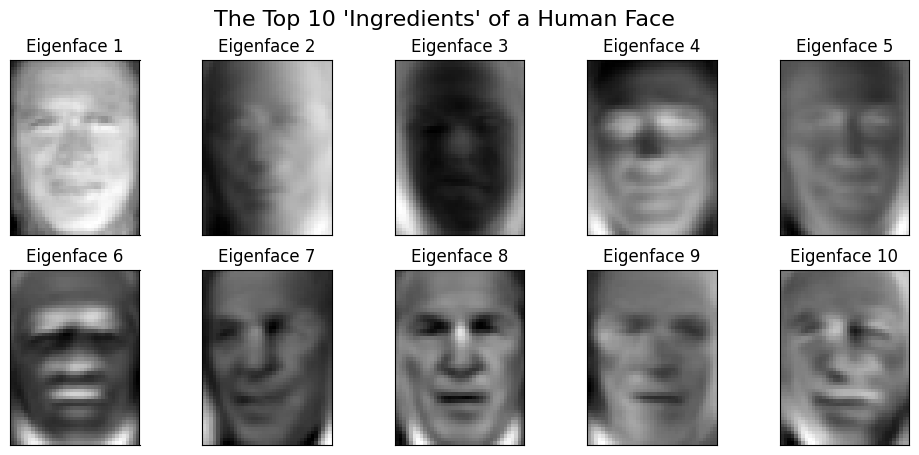

In [33]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(12, 5),
                         subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    eigenface = pca.components_[i]
    ax.imshow(eigenface.reshape((h, w)), cmap='gray')

    ax.set_title(f"Eigenface {i+1}")

plt.suptitle("The Top 10 'Ingredients' of a Human Face", fontsize=16)
plt.show()

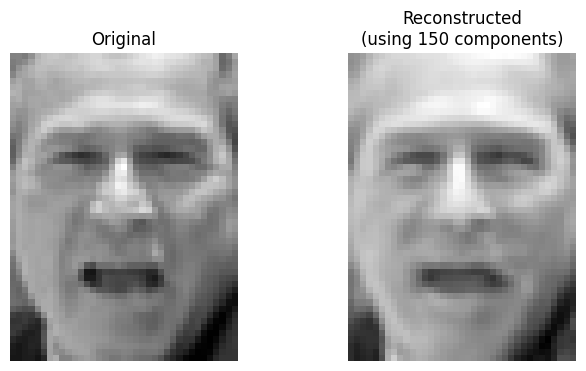

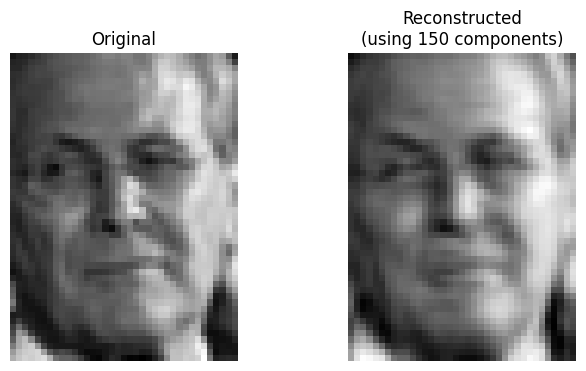

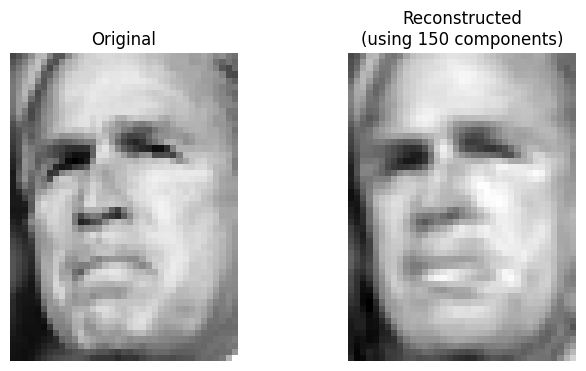

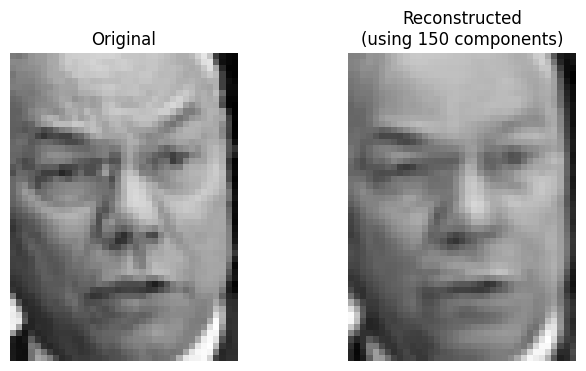

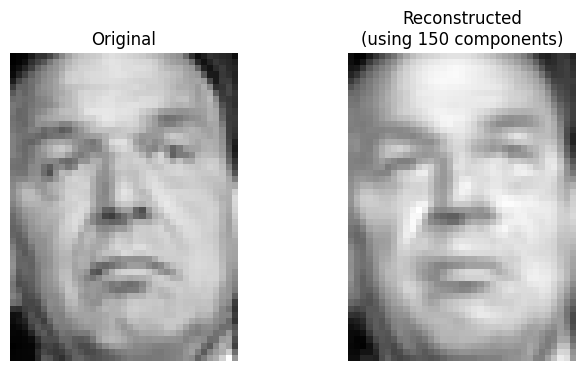

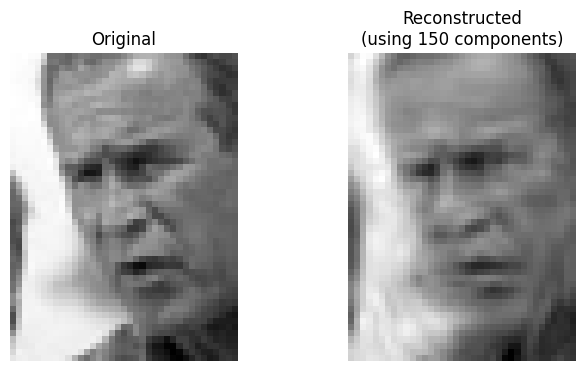

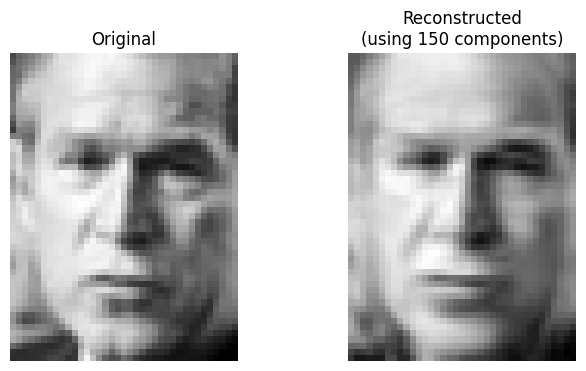

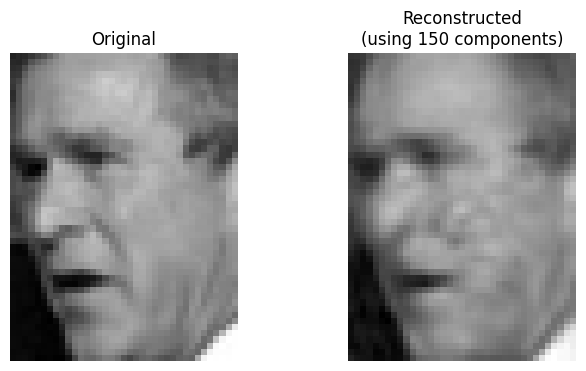

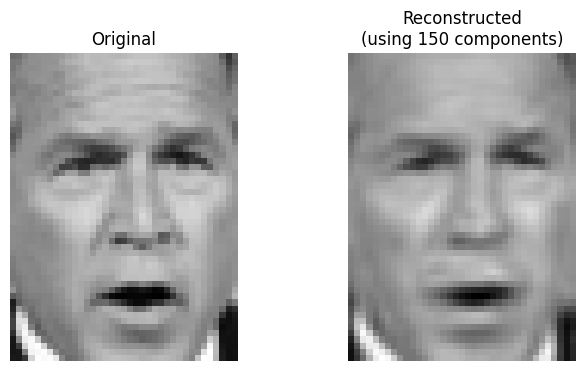

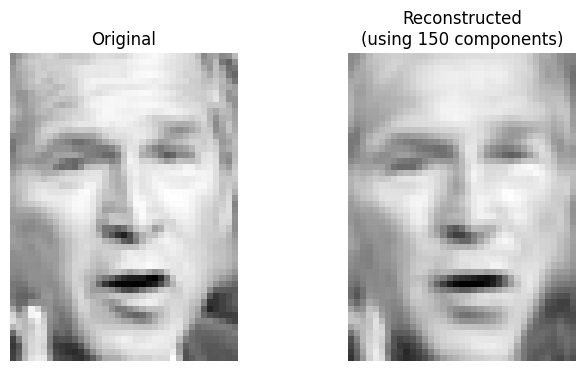

In [45]:
for face_index in range(10, 20):
  # face_index = 100
  org_face = X[face_index].reshape(1, -1)

  comp_face = pca.transform(org_face)
  rec_face = pca.inverse_transform(comp_face)
  fig, ax = plt.subplots(1, 2, figsize=(8, 4))

  # Plot Original
  # We reshape the FLAT row back into a 2D Rectangle (h, w)
  ax[0].imshow(org_face.reshape((h, w)), cmap='gray')
  ax[0].set_title("Original")
  ax[0].axis('off')

  # Plot Reconstruction
  ax[1].imshow(rec_face.reshape((h, w)), cmap='gray')
  ax[1].set_title(f"Reconstructed\n(using {pca.n_components_} components)")
  ax[1].axis('off')

  plt.show()

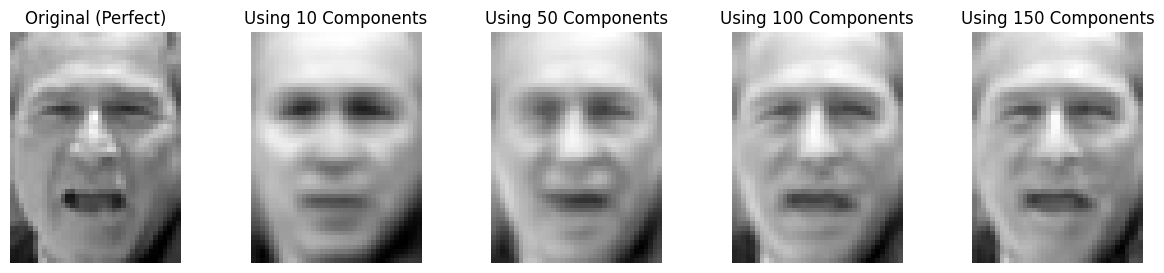

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Pick a face
face_id = 10
original = X[face_id].reshape(1, -1)

# 2. We will reconstruct it using 10, 50, 100, and 150 components
n_components_list = [10, 50, 100, 150]

plt.figure(figsize=(15, 3))

# Plot Original First
plt.subplot(1, 5, 1)
plt.imshow(original.reshape(h, w), cmap='gray')
plt.title("Original (Perfect)")
plt.axis('off')

# Plot Reconstructions
for i, n in enumerate(n_components_list):
    # A. Compress to 'n' components
    # We slice the PCA components to only use the first 'n'
    # (Manual transformation to show the effect)
    coeffs = np.dot(original - pca.mean_, pca.components_[:n].T)
    reconstruction = np.dot(coeffs, pca.components_[:n]) + pca.mean_

    plt.subplot(1, 5, i + 2)
    plt.imshow(reconstruction.reshape(h, w), cmap='gray')
    plt.title(f"Using {n} Components")
    plt.axis('off')

plt.show()